In [1]:
pip install Scikit-Fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Scikit-Fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=2d6f75b1b26884df8fc5f515ab942699fb8a0946db4f8395e969b2a79c3a229f
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built Scikit-Fuzzy


In [2]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

65.2110655737705


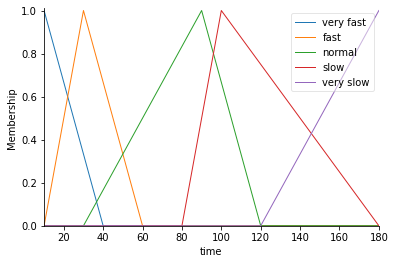

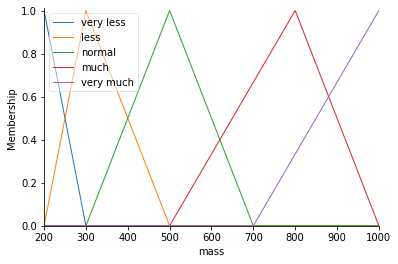

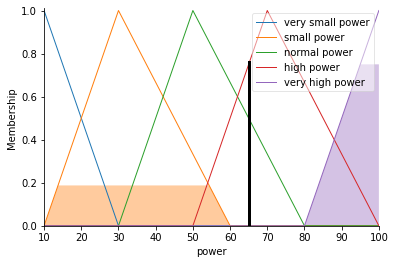

In [4]:
#Bài toán nồi cơm điện
time = ctrl.Antecedent(np.arange(10,181,10),'time')   
mass = ctrl.Antecedent(np.arange(200,1001,100),'mass')
power = ctrl.Consequent(np.arange(10,101,10),'power')

time['very fast'] = fuzz.trimf(time.universe,[10,10,40])
time['fast'] = fuzz.trimf(time.universe,[10,30,60])
time['normal'] = fuzz.trimf(time.universe,[30,90,120])            
time['slow'] = fuzz.trimf(time.universe,[80,100,180])
time['very slow'] = fuzz.trimf(time.universe,[120,180,180]) 

mass['very less'] = fuzz.trimf(mass.universe,[200,200,300])
mass['less'] = fuzz.trimf(mass.universe,[200,300,500])
mass['normal'] = fuzz.trimf(mass.universe,[300,500,700])
mass['much'] = fuzz.trimf(mass.universe,[500,800,1000])
mass['very much'] = fuzz.trimf(mass.universe,[700,1000,1000])

power['very small power'] = fuzz.trimf(power.universe,[10,10,30])
power['small power'] = fuzz.trimf(power.universe,[10,30,60])
power['normal power'] = fuzz.trimf(power.universe,[30,50,80])
power['high power'] = fuzz.trimf(power.universe,[50,70,100])
power['very high power'] = fuzz.trimf(power.universe,[80,100,100])

time.view()
mass.view()

rule1 = ctrl.Rule(time['very fast']&mass['very less'],power['normal power'])
rule2 = ctrl.Rule(time['fast']&mass['very less'],power['normal power'])
rule3 = ctrl.Rule(time['normal']&mass['very less'],power['small power'])
rule4 = ctrl.Rule(time['slow']&mass['very less'],power['small power'])
rule5 = ctrl.Rule(time['very slow']&mass['very less'],power['very small power'])
rule6 = ctrl.Rule(time['very fast']&mass['less'],power['normal power'])
rule7 = ctrl.Rule(time['fast']&mass['less'],power['normal power'])
rule8 = ctrl.Rule(time['normal']&mass['less'],power['small power'])
rule9 = ctrl.Rule(time['slow']&mass['less'],power['small power'])
rule10 = ctrl.Rule(time['very slow']&mass['less'],power['very small power'])
rule11 = ctrl.Rule(time['very fast']&mass['normal'],power['high power'])
rule12 = ctrl.Rule(time['fast']&mass['normal'],power['high power'])
rule13 = ctrl.Rule(time['normal']&mass['normal'],power['normal power'])
rule14 = ctrl.Rule(time['slow']&mass['normal'],power['small power'])
rule15 = ctrl.Rule(time['very slow']&mass['normal'],power['very high power'])
rule16 = ctrl.Rule(time['very fast']&mass['much'],power['very high power'])
rule17 = ctrl.Rule(time['fast']&mass['much'],power['high power'])
rule18 = ctrl.Rule(time['normal']&mass['much'],power['normal power'])
rule19 = ctrl.Rule(time['slow']&mass['much'],power['normal power'])
rule20 = ctrl.Rule(time['very slow']&mass['much'],power['small power'])
rule21 = ctrl.Rule(time['very fast']&mass['very much'],power['very high power'])
rule22 = ctrl.Rule(time['fast']&mass['very much'],power['very high power'])
rule23 = ctrl.Rule(time['normal']&mass['very much'],power['high power'])
rule24 = ctrl.Rule(time['slow']&mass['very much'],power['normal power'])
rule25 = ctrl.Rule(time['very slow']&mass['very much'],power['normal power'])



power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(power_ctrl)

powering.input['time']=165
powering.input['mass']=500
powering.compute()

print(powering.output['power'])
power.view(sim=powering)